In [ ]:
!pip install konlpy
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh
!pip install google_trans_new
!pip install transformers==4.4.1
!pip install tokenizers==0.10.1

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 91 (delta 43), reused 22 (delta 6), pack-reused 0
Unpacking objects: 100% (91/91), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2021-06-10 14:47:51--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22c3:9b0a, 2406:da00:ff00::6b17:d1f5, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://bbuseruploads.s3.amazonaws.com/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz?Signature=xKv9QfMftecw7iyBqIgBLUl1BOc%3D&Expires=1623337582&AWSAccessKeyId=AKIA6K

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import io
from apiclient.http import MediaFileUpload, MediaIoBaseDownload
from google.colab import auth
auth.authenticate_user()
from googleapiclient.discovery import build
service = build('drive', 'v3')

In [ ]:
# other

import glob                                    #list path
from PIL import Image, ImageFont, ImageDraw   #draw text
import textwrap                               #draw text
from tqdm import tqdm
from matplotlib import pyplot as plt
import re
import os
from pdb import set_trace
import numpy as np
from google.colab import files
from google.colab.patches import cv2_imshow
from IPython.display import display
import cv2
import tensorflow as tf
import pandas as pd
import numpy as np
import time
import tensorflow_datasets as tfds
from konlpy.tag import Komoran
import collections
import sys
import nltk
import datetime
import keras
from konlpy.tag import Mecab 
from tokenizers import BertWordPieceTokenizer
from transformers import BertTokenizerFast
from google_trans_new import google_translator 
mecab = Mecab().morphs
nltk.download('punkt')
translator = google_translator()  
selectedLang = 'english' 
LANGUAGES = {'afrikaans': 'af', 'albanian': 'sq', 'amharic': 'am', 'arabic': 'ar', 'armenian': 'hy', 'azerbaijani': 'az', 'basque': 'eu', 'belarusian': 'be', 'bengali': 'bn', 'bosnian': 'bs', 'bulgarian': 'bg', 'catalan': 'ca', 'cebuano': 'ceb', 'chichewa': 'ny', 'chinese (simplified)': 'zh-cn', 'chinese (traditional)': 'zh-tw', 'corsican': 'co', 'croatian': 'hr', 'czech': 'cs', 'danish': 'da', 'dutch': 'nl', 'english': 'en', 'esperanto': 'eo', 'estonian': 'et', 'filipino': 'tl', 'finnish': 'fi', 'french': 'fr', 'frisian': 'fy', 'galician': 'gl', 'georgian': 'ka', 'german': 'de', 'greek': 'el', 'gujarati': 'gu', 'haitian creole': 'ht', 'hausa': 'ha', 'hawaiian': 'haw', 'hebrew': 'iw', 'hindi': 'hi', 'hmong': 'hmn', 'hungarian': 'hu', 'icelandic': 'is', 'igbo': 'ig', 'indonesian': 'id', 'irish': 'ga', 'italian': 'it', 'japanese': 'ja', 'javanese': 'jw', 'kannada': 'kn', 'kazakh': 'kk', 'khmer': 'km', 'korean': 'ko', 'kurdish (kurmanji)': 'ku', 'kyrgyz': 'ky', 'lao': 'lo', 'latin': 'la', 'latvian': 'lv', 'lithuanian': 'lt', 'luxembourgish': 'lb', 'macedonian': 'mk', 'malagasy': 'mg', 'malay': 'ms', 'malayalam': 'ml', 'maltese': 'mt', 'maori': 'mi', 'marathi': 'mr', 'mongolian': 'mn', 'myanmar (burmese)': 'my', 'nepali': 'ne', 'norwegian': 'no', 'pashto': 'ps', 'persian': 'fa', 'polish': 'pl', 'portuguese': 'pt', 'punjabi': 'pa', 'romanian': 'ro', 'russian': 'ru', 'samoan': 'sm', 'scots gaelic': 'gd', 'serbian': 'sr', 'sesotho': 'st', 'shona': 'sn', 'sindhi': 'sd', 'sinhala': 'si', 'slovak': 'sk', 'slovenian': 'sl', 'somali': 'so', 'spanish': 'es', 'sundanese': 'su', 'swahili': 'sw', 'swedish': 'sv', 'tajik': 'tg', 'tamil': 'ta', 'telugu': 'te', 'thai': 'th', 'turkish': 'tr', 'ukrainian': 'uk', 'urdu': 'ur', 'uzbek': 'uz', 'vietnamese': 'vi', 'welsh': 'cy', 'xhosa': 'xh', 'yiddish': 'yi', 'yoruba': 'yo', 'zulu': 'zu'}
langCode=LANGUAGES[selectedLang]
data_directory = "./drive/My Drive/data"

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
mainTempFolder="./drive/My Drive/tmp/"
textOnlyFolder=mainTempFolder+"textOnly/"
inpaintedFolder=mainTempFolder+"inpainted/"
transalatedFolder=mainTempFolder+"translated/"

['comics/kim/3.png', 'comics/kim/8.png', 'comics/kim/4.png', 'comics/kim/10.png', 'comics/kim/6.png', 'comics/kim/7.png', 'comics/kim/9.png', 'comics/kim/2.png', 'comics/kim/12.png', 'comics/kim/11.png']
kim
['comics/kim/10.png', 'comics/kim/11.png', 'comics/kim/12.png', 'comics/kim/2.png', 'comics/kim/3.png', 'comics/kim/4.png', 'comics/kim/6.png', 'comics/kim/7.png', 'comics/kim/8.png', 'comics/kim/9.png']
10.png


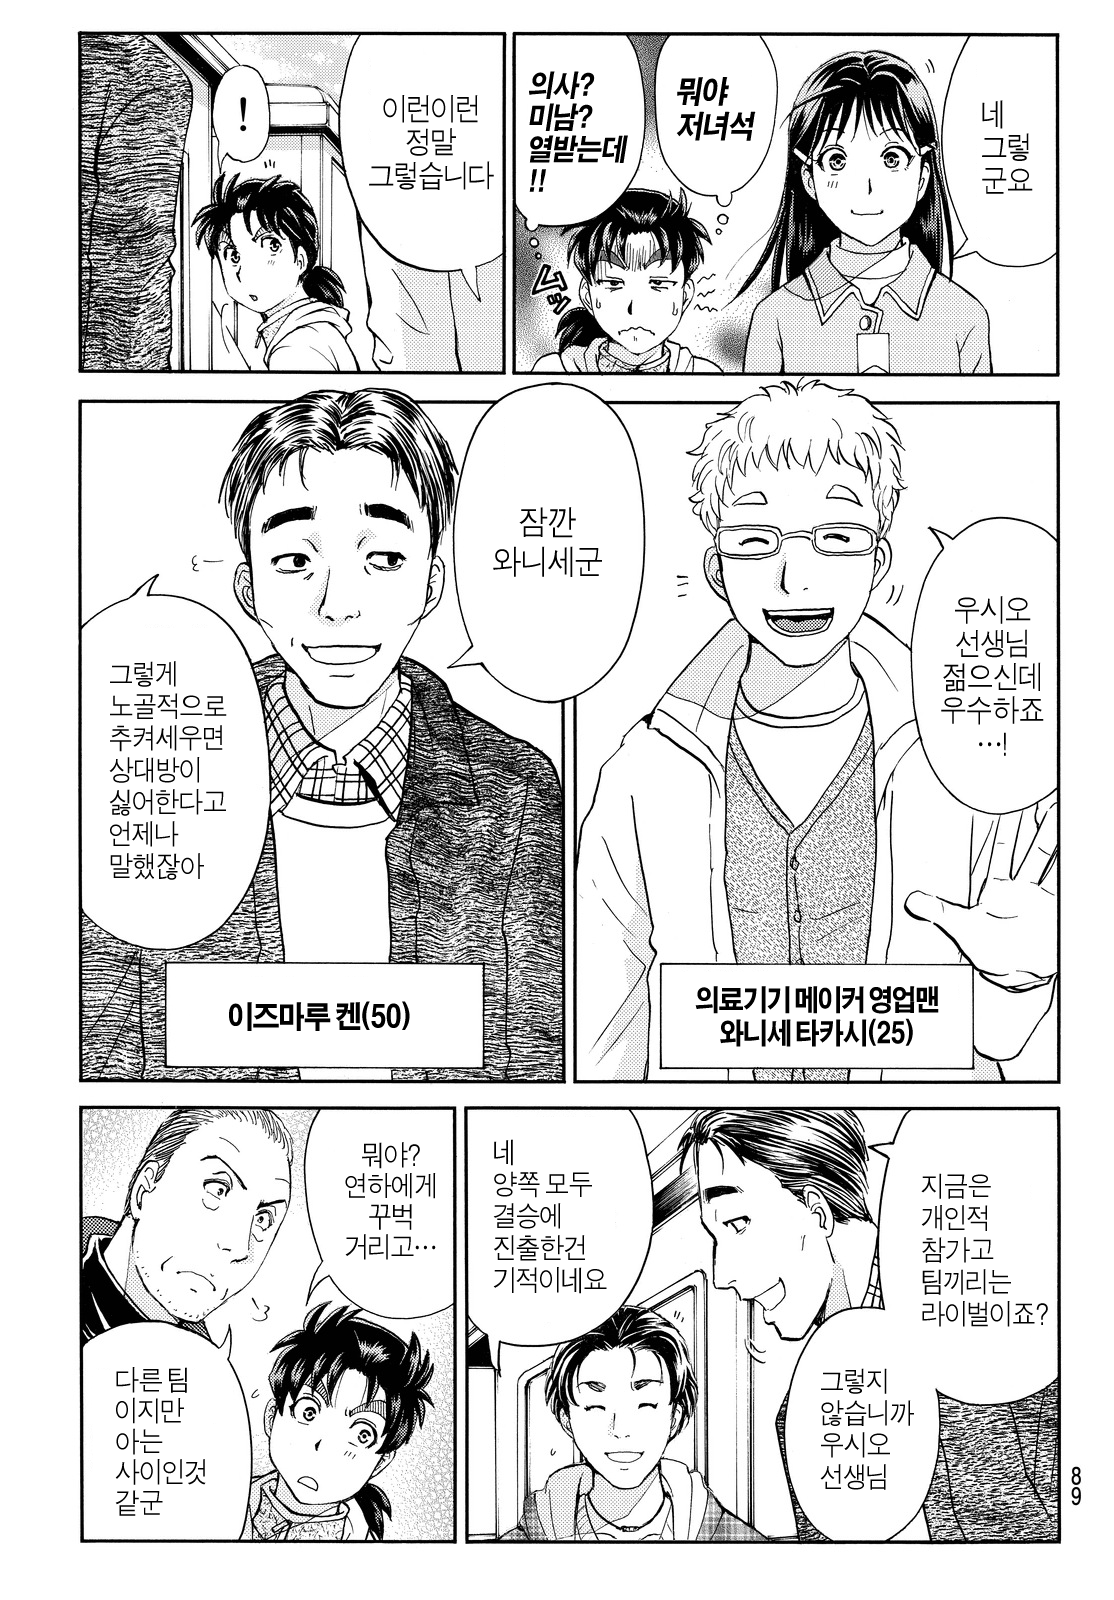

In [ ]:
downloadFileList=glob.glob("comics/*/*.png")
print(downloadFileList)
downloadFileList.sort()
mangaName=os.path.basename(glob.glob("comics/*")[0])
print(mangaName)
print(downloadFileList)
print(os.path.basename(downloadFileList[0]))
Image.open(downloadFileList[0])

 30%|███       | 3/10 [00:00<00:00, 23.13it/s]

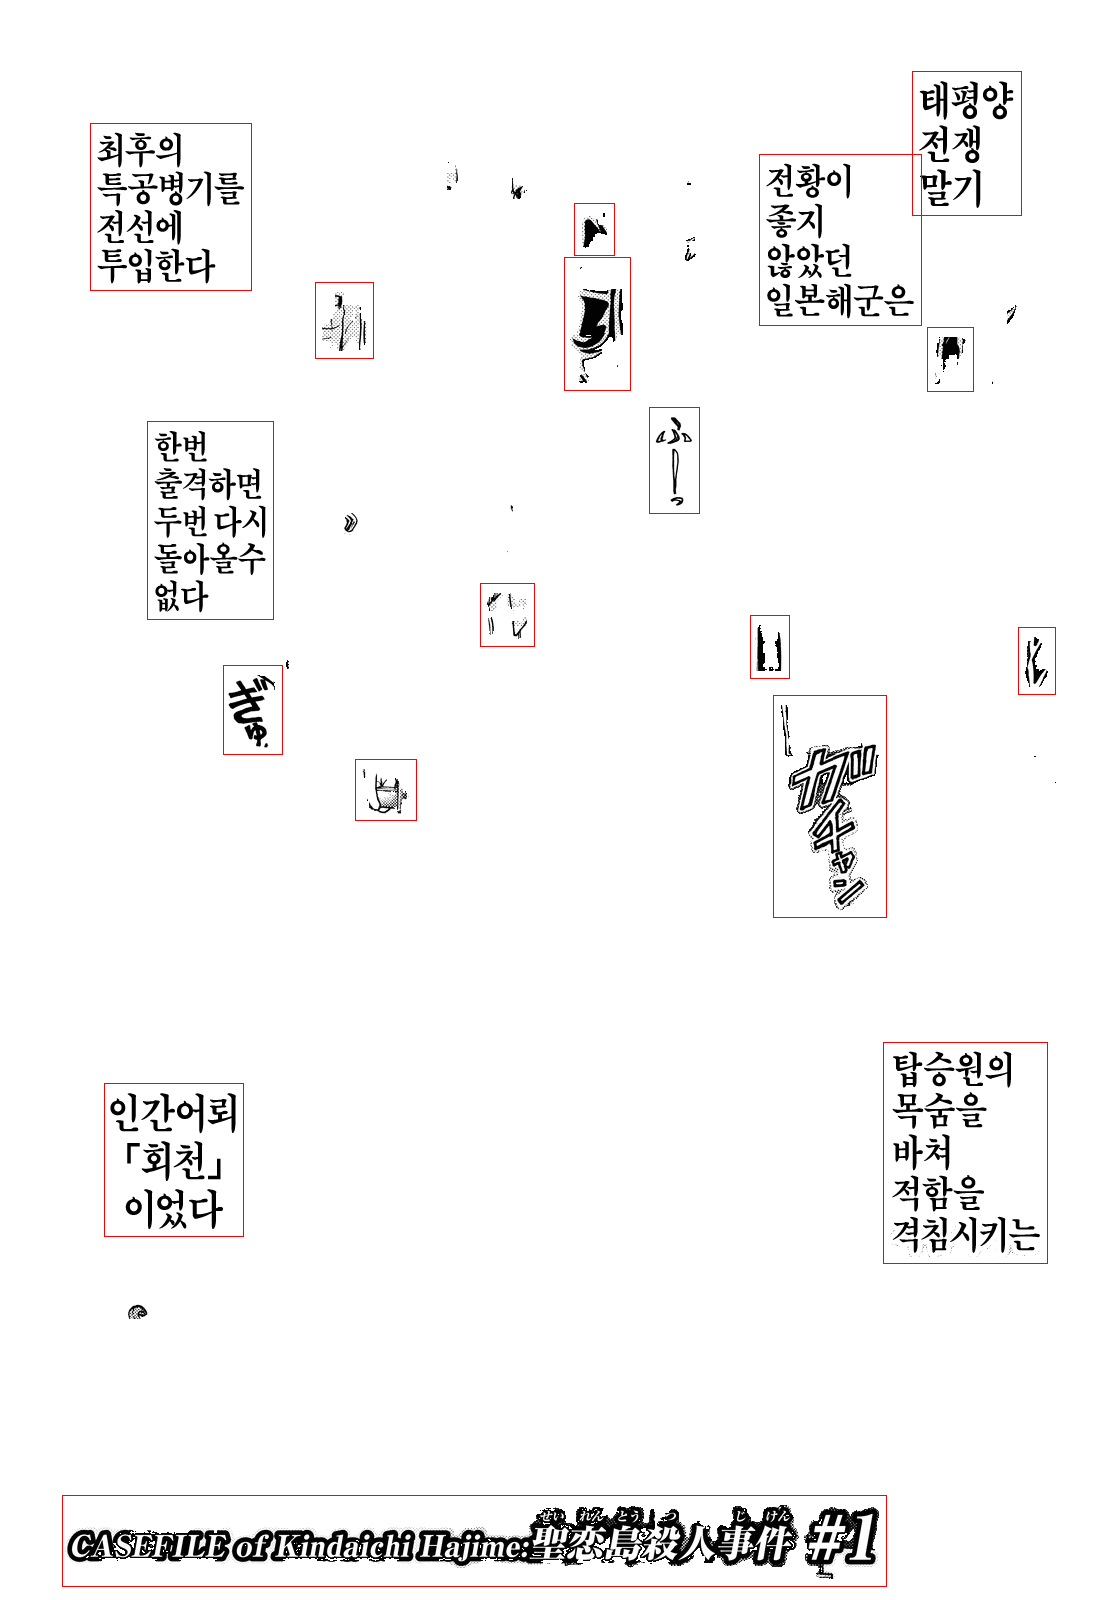

100%|██████████| 10/10 [00:00<00:00, 17.36it/s]


In [ ]:
# text detection

def text_detect(img,ele_size=(8,2)): #
    #https://github.com/qzane/text-detection
    if len(img.shape)==3:
        img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img_sobel = cv2.Sobel(img,cv2.CV_8U,1,0)#same as default,None,3,1,0,cv2.BORDER_DEFAULT)
    img_threshold = cv2.threshold(img_sobel,0,255,cv2.THRESH_OTSU+cv2.THRESH_BINARY)
    element = cv2.getStructuringElement(cv2.MORPH_RECT,ele_size)
    img_threshold = cv2.morphologyEx(img_threshold[1],cv2.MORPH_CLOSE,element)
    res = cv2.findContours(img_threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    if cv2.__version__.split(".")[0] == '3':
        _, contours, hierarchy = res
    else:
        contours, hierarchy = res
    Rect = [cv2.boundingRect(i) for i in contours if i.shape[0]>100]                                              #no padding, box    #x,y,w,h
    RectP = [(max(int(i[0]-10),0),max(int(i[1]-10),0),min(int(i[0]+i[2]+5),img.shape[1]),min(int(i[1]+i[3]+5),img.shape[0])) for i in Rect]       #with padding, box  x1,y1,x2,y2 
    return RectP,Rect

rectDict=dict()
for i,imgPath in enumerate(tqdm(downloadFileList)):
    fileName=os.path.basename(imgPath)
    img = cv2.imread(textOnlyFolder+fileName)
    rectP,rect = text_detect(img,ele_size=(int(img.shape[1]*0.020),int(img.shape[0]*0.020)))  #x,y  20,25
    rectDict[fileName]=[rectP,rect]
    #display
    if i==int(len(downloadFileList)/3):
      for i in rectP:
        cv2.rectangle(img,i[:2],i[2:],(0,0,255))
      cv2_imshow(img)     

In [ ]:
# OCR

def filterText(inputText):
    inputText = re.sub('[\\\\+/§◎*)@<>#%(&=$_\-^01234567890ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz:;«¢~「」〃ゝゞヽヾ一●▲・ヽ÷①↓®▽■◆『£〆∴∞▼™↑←]', '', inputText)   #remove special char
    inputText = re.sub('[ぁ-ゔァ-ヴー々〆〤一-龥]','', inputText)
    inputText = ' '.join(inputText.split())    #remove whitespace
    return inputText

def getTextGoogleOcr(img):
    exceptionCount=0
    while exceptionCount<5:
        try:
            #https://tanaikech.github.io/2017/05/02/ocr-using-google-drive-api/
            txtPath = 'googleocr.txt'  # Text file outputted by OCR
            imgPath="googleocr.jpg"
            cv2.imwrite(imgPath, img)  
            mime = 'application/vnd.google-apps.document'
            res = service.files().create(
                body={'name': imgPath,
                    'mimeType': mime },
                media_body=MediaFileUpload(imgPath, mimetype=mime, resumable=True) ).execute()
            downloader = MediaIoBaseDownload(
                io.FileIO(txtPath, 'wb'),
                service.files().export_media(fileId=res['id'], mimeType="text/plain"))
            done = False
            while done is False:
                status, done = downloader.next_chunk()
            service.files().delete(fileId=res['id']).execute()
            with  open(txtPath, "r") as f:   text_google = f.read()    #txt to str
            text_google=text_google.replace('\ufeff', '') 
            text_google=filterText(text_google)
        except:
            exceptionCount+=1
            continue
        break

    return text_google

textListDict=dict({})
for i,imgPath in enumerate(tqdm(downloadFileList)):
    fileName=os.path.basename(imgPath)
    img = cv2.imread(textOnlyFolder+fileName)
    img = cv2.fastNlMeansDenoisingColored(img,None,10,10)     #remove noise
    textList=[]
    rectP,rect=rectDict[fileName]
    for x1,y1,x2,y2 in rectP: 
      # Cropping the text block for giving input to OCR 
      cropped = img[y1: y2, x1: x2] 
      # text_tesseract=getTextPytesseract(cropped)
      # text_nhocr=getTextNhocr(cropped,size=2)
      text=getTextGoogleOcr(cropped)
      textList+=[text]
    textListDict[fileName]=textList

100%|██████████| 10/10 [21:53<00:00, 131.39s/it]


In [ ]:
textListDict

{'10.png': ['그렇지 않습니까 우시오 선생님.',
  '다른 팀 이지만 아는 사이인것 같군',
  '',
  '지금은 개인적 참가고 팀끼리는 라이벌이죠?',
  '뭐야? 연하에게 | 꾸벅 거리고...',
  '양쪽 모두 결승에 진출한건 기적이네요.',
  '이즈마루 켄',
  '의료기기 메이커 영업맨 와니세 타카시',
  '',
  '그렇게 노골적으로 추켜세우면 상대방이 싫어한다고 언제나 말했잖아',
  '우시오 | 선생님 젊으신데, 우수하죠. ...!',
  '잠깐 와니세군',
  '',
  '',
  '',
  '렇요 네그군',
  '이런이런 | 정말 그렇습니다.',
  '뭐야 저녀석',
  '의사? 미남? 열받는데'],
 '11.png': ['',
  '뭐...뭐야 카메라맨',
  '',
  '',
  '',
  '어이쿠',
  '',
  '| 잠깐! 멈춰요!',
  '',
  '',
  '',
  '',
  '',
  '그래...!',
  '뭐랄까 미묘한 사람들과 함께 지내게 됐네.',
  '그야 이즈마루씨가 개인적인 휴가라고 말했잖아요.',
  '',
  '뭐? 하여튼. 요즘 젊은 영업맨은...!',
  '아! 명함 놓고, 왔네요.',
  '| 저는 제약회사에 다니는 이즈마루 라고 합니다.',
  '',
  '와니세군 어서',
  '',
  '',
  '',
  '아실례 합니다.',
  '여기 젊은친구는 계열회사의 의료기기 메이커 영업입니다.',
  ''],
 '12.png': ['여류작가 우류 아카네',
  '죄송 합니다. 저희 오쿠 노기기 무슨...',
  '',
  '이번대회를 | 소재로 | 새로운 | 소설을 쓸 예정이에요..',
  '',
  '오쿠노기는 | 제편집자 입니다.',
  '아저는 소설가 우류 아카네라고 합니다!',
  '뭐? 소설취재!? 뭐야 그게',
  '여의사 칸노미카',
  '편집자 오쿠노기 무사시',
  '당신!!',
  '주최측의 허가도 받았고...!',
  '',
  '',
  '',
  '',
  '멋대로 남의

In [ ]:
import sys
sys.path.append('/content/drive/My Drive/')

In [ ]:
%cd MyDrive/comic_trans_project/module/

/content/drive/MyDrive/comic_trans_project/module


In [ ]:
from transformer_model import transformer, CustomSchedule, loss_function

In [ ]:
# vocab size : 10776
# vocab size : 11014

tf.keras.backend.clear_session()

# Hyper-parameters
D_MODEL = 256
NUM_LAYERS = 2
NUM_HEADS = 8
DFF = 512
DROPOUT = 0.1

model = transformer(
    kor_dict_size=10776,
    eng_dict_size=11014,
    num_layers=NUM_LAYERS,
    dff=DFF,
    d_model=D_MODEL,
    num_heads=NUM_HEADS,
    dropout=DROPOUT)

(1, 10776, 256)
(1, 11014, 256)


In [ ]:
learning_rate = CustomSchedule(D_MODEL)

optimizer = tf.keras.optimizers.Adam(
    learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

def accuracy(y_true, y_pred):
  # 레이블의 크기는 (batch_size, MAX_LENGTH - 1)
  y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
  return tf.keras.metrics.sparse_categorical_accuracy(y_true, y_pred)

model.compile(optimizer=optimizer, loss=loss_function, metrics=[accuracy])
model.summary()

Model: "transformer"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             [(None, None)]       0                                            
__________________________________________________________________________________________________
dec_inputs (InputLayer)         [(None, None)]       0                                            
__________________________________________________________________________________________________
enc_padding_mask (Lambda)       (None, 1, 1, None)   0           inputs[0][0]                     
__________________________________________________________________________________________________
encoder (Functional)            (None, None, 256)    3812864     inputs[0][0]                     
                                                                 enc_padding_mask[0][0] 

In [ ]:
%cd ..

/content


In [ ]:
model.load_weights('/content/drive/My Drive/comic_trans_project/checkpoints/transformer_subword.hdf5')

In [ ]:
hf_model_path_kr='./drive/My Drive/comic_trans_project/token/korean_tokenizer_model'
hf_model_path_en='./drive/My Drive/comic_trans_project/token/english_tokenizer_model'
tokenizer_kr = BertTokenizerFast.from_pretrained(hf_model_path_kr+'_special')
tokenizer_en = BertTokenizerFast.from_pretrained(hf_model_path_en+'_special')

In [ ]:
MAX_LENGTH = 70

def evaluate(sentence):

  sentence = tf.expand_dims(tokenizer_kr.encode(sentence), axis=0)
  output = tf.expand_dims([tokenizer_kr.cls_token_id], 0)

  # 디코더의 예측 시작
  for i in range(MAX_LENGTH):
    predictions = model(inputs=[sentence, output], training=False)

    # 현재(마지막) 시점의 예측 단어를 받아온다.
    predictions = predictions[:, -1:, :]
    predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)

    # 만약 마지막 시점의 예측 단어가 종료 토큰이라면 예측을 중단
    if tf.equal(predicted_id, tokenizer_en.sep_token_id):
      break

    # 마지막 시점의 예측 단어를 출력에 연결한다.
    # 이는 for문을 통해서 디코더의 입력으로 사용될 예정이다.
    output = tf.concat([output, predicted_id], axis=-1)

  return tf.squeeze(output, axis=0)

def predict(sentence):
  prediction = evaluate(sentence)

  predicted_sentence = tokenizer_en.decode(
      [i for i in prediction if i < tokenizer_en.vocab_size and i != 2])

  return predicted_sentence

In [ ]:
#####################translate

textListDict_trans=dict({})
for i,imgPath in enumerate(tqdm(downloadFileList)):
    fileName=os.path.basename(imgPath)    
    textList=textListDict[fileName]
    textList_trans=[]
    for text in textList:
        text_trans=predict(text)    if len(text)!=0 else "" 
        textList_trans+=[text_trans] 
    textListDict_trans[fileName]=textList_trans

100%|██████████| 10/10 [01:13<00:00,  7.32s/it]


In [ ]:
textListDict_trans

{'10.png': ['yessirreesiree.',
  'other teams are like even better than the other team.',
  '',
  'is now the personal groups? － － yesi have?',
  "what's the row?",
  'the whole position of the missiles is to the cross.',
  'the violent scenes in this animal.',
  'the medical help! a bedman teemor shopers loaded.',
  '',
  "by that's a terrible nani along some always'd always say some are!",
  'take the liberty to go slowly.',
  'come to a second half paran soon',
  '',
  '',
  '',
  'yourself by yourself',
  "that's a bit off.",
  'matter with that fle.',
  'is the doctor open for?.'],
 '11.png': ['',
  'it is matter for... it was once a camera.',
  '',
  '',
  '',
  'the good basket along',
  '',
  'stop!',
  '',
  '',
  '',
  '',
  '',
  'yessirreesiree.',
  "it's been everyoneing with roundexacte.",
  'the meter was only a part of the countryerdipating now in the middle of the subject.',
  '',
  'a teacher is such a year as a big as a year.',
  'ohgoonquishop their right.',
  "stop

In [ ]:
def getFont(lang,size=25):
  fontList=os.popen('fc-list :lang='+lang+' | grep style=Regular').read().split("\n")[:-1]  #load regular style font pathList
  if len(fontList)==0: fontList=os.popen('fc-list :lang='+langCode).read().split("\n")[:-1]   #if no regular style font load remain font pathList
  fontList=[i.split(":")[0] for i in fontList]              #get only path data from string
  fontPath=fontList[0]
  return ImageFont.truetype(fontPath, size)


#################draw text
def drawText(imgPath,rect,textList,lang,break_long_words=False):
  img = Image.open(imgPath)
  fontSize=int(img.size[1]*0.015)
  imageFont=getFont(lang,fontSize)
  draw = ImageDraw.Draw(img)
  for text,(x,y,w,h)  in zip(textList,rect):
    if text=="": continue
    for line in textwrap.wrap(text, width=w//imageFont.size+1,break_long_words=break_long_words):   #split text to fit into box
        #text stroke
        shadowcolor=(255,255,255) #white
        strokeSize=2
        # thin border
        draw.text((x-strokeSize, y), line, font=imageFont, fill=shadowcolor)
        draw.text((x+strokeSize, y), line, font=imageFont, fill=shadowcolor)
        draw.text((x, y-strokeSize), line, font=imageFont, fill=shadowcolor)
        draw.text((x, y+strokeSize), line, font=imageFont, fill=shadowcolor)
        # thicker border
        draw.text((x-strokeSize, y-strokeSize), line, font=imageFont, fill=shadowcolor)
        draw.text((x+strokeSize, y-strokeSize), line, font=imageFont, fill=shadowcolor)
        draw.text((x-strokeSize, y+strokeSize), line, font=imageFont, fill=shadowcolor)
        draw.text((x+strokeSize, y+strokeSize), line, font=imageFont, fill=shadowcolor)
        #draw text
        draw.text((x, y), line, font=imageFont, fill=(0, 0, 0))  #black
        y += imageFont.size+strokeSize

  return img

for i,imgPath in enumerate(tqdm(downloadFileList)):
    fileName=os.path.basename(imgPath)
    rectP,rect=rectDict[fileName]
    im=drawText(inpaintedFolder+fileName,rect,textListDict_trans[fileName],langCode)
    im.save(transalatedFolder+fileName) 
    #display
    if i==int(len(downloadFileList)/3):
      im_oriText=drawText(inpaintedFolder+fileName,rect,textListDict[fileName],"kr",break_long_words=True)
      display(im)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
############## browser downloader
os.system('mkdir  -p "'+mangaName+'/"')
os.system('cp -r '+transalatedFolder+'. "'+mangaName+'/"')
os.system('zip -r "'+mangaName+'.zip" "'+mangaName+'/"')
files.download(mangaName+".zip")   

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# google trans

textListDict_trans=dict({})
for i,imgPath in enumerate(tqdm(downloadFileList)):
    fileName=os.path.basename(imgPath)    
    textList=textListDict[fileName]
    textList_trans=[]
    for text in textList:
        text_trans=translator.translate(text, lang_tgt=langCode,)    if len(text)!=0 else "" 
        textList_trans+=[text_trans] 
    textListDict_trans[fileName]=textList_trans


100%|██████████| 10/10 [00:04<00:00,  2.03it/s]


In [ ]:
textListDict_trans

{'10.png': ['Is not it? ',
  "I think it's a different team, but I know. ",
  '',
  'Is it a rival who is a personal participation and a team now? ',
  'what? To Yeon | Circle ... ',
  'Both are miraculous for both the finals. ',
  'Izumaruken ',
  'Medical Machinery Maker Sales Man Waniise Takashi ',
  '',
  'I always said that if you do not like it if you are so explicitly. ',
  'Wuyi | You are young, excellent. ...! ',
  'Wait a minute. ',
  '',
  '',
  '',
  "That's Neg. ",
  "This is this | That's really true. ",
  'What are you? ',
  "doctor? beauty? I'm in a heat "],
 '11.png': ['',
  'Well ... what is the camera man ',
  '',
  '',
  '',
  'Ikku ',
  '',
  '| awhile! Stop! ',
  '',
  '',
  '',
  '',
  '',
  'okay...! ',
  "It's been with the subtle people. ",
  'He said that Mr. Izmaru is a personal vacation. ',
  '',
  'What? anyway. Nowadays, young salesman ...! ',
  'Ah! I left the business card. ',
  '| I am called a pharmaceutical company. ',
  '',
  'Waniseise ',
  '',
  '

 30%|███       | 3/10 [00:01<00:03,  1.93it/s]

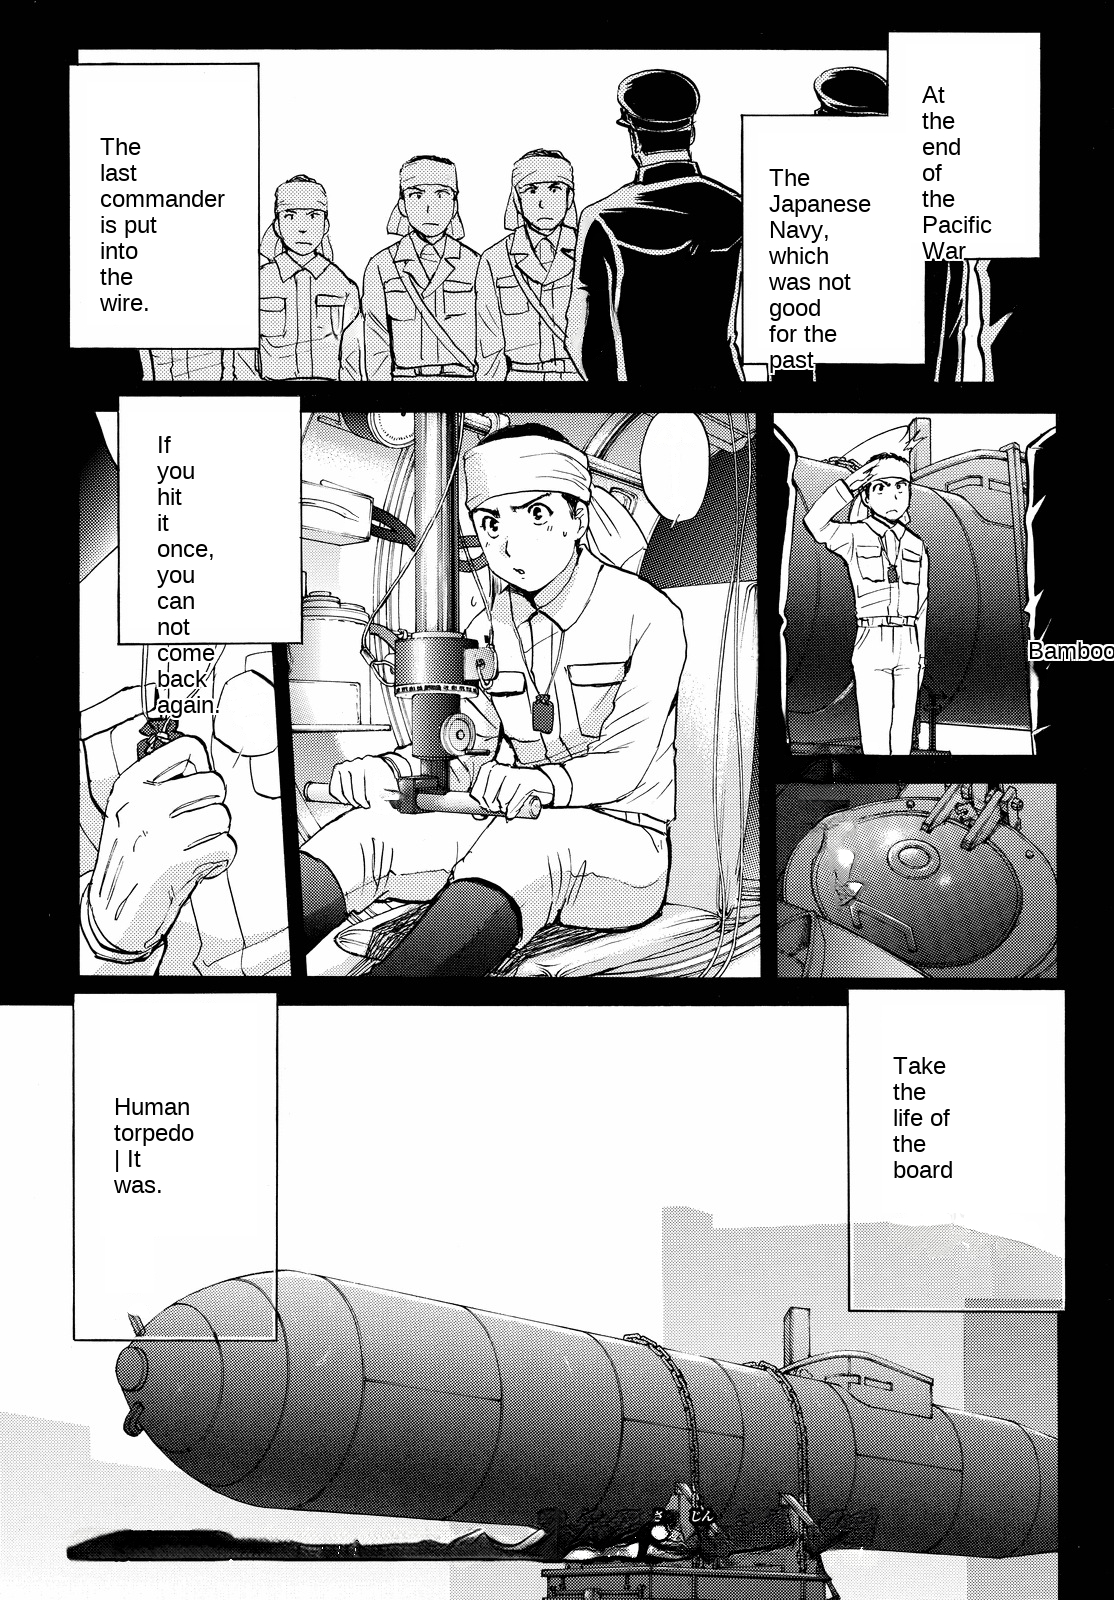

100%|██████████| 10/10 [00:05<00:00,  1.68it/s]


In [ ]:
def getFont(lang,size=25):
  fontList=os.popen('fc-list :lang='+lang+' | grep style=Regular').read().split("\n")[:-1]  #load regular style font pathList
  if len(fontList)==0: fontList=os.popen('fc-list :lang='+langCode).read().split("\n")[:-1]   #if no regular style font load remain font pathList
  fontList=[i.split(":")[0] for i in fontList]              #get only path data from string
  fontPath=fontList[0]
  return ImageFont.truetype(fontPath, size)


#################draw text
def drawText(imgPath,rect,textList,lang,break_long_words=False):
  img = Image.open(imgPath)
  fontSize=int(img.size[1]*0.015)
  imageFont=getFont(lang,fontSize)
  draw = ImageDraw.Draw(img)
  for text,(x,y,w,h)  in zip(textList,rect):
    if text=="": continue
    for line in textwrap.wrap(text, width=w//imageFont.size+1,break_long_words=break_long_words):   #split text to fit into box
        #text stroke
        shadowcolor=(255,255,255) #white
        strokeSize=2
        # thin border
        draw.text((x-strokeSize, y), line, font=imageFont, fill=shadowcolor)
        draw.text((x+strokeSize, y), line, font=imageFont, fill=shadowcolor)
        draw.text((x, y-strokeSize), line, font=imageFont, fill=shadowcolor)
        draw.text((x, y+strokeSize), line, font=imageFont, fill=shadowcolor)
        # thicker border
        draw.text((x-strokeSize, y-strokeSize), line, font=imageFont, fill=shadowcolor)
        draw.text((x+strokeSize, y-strokeSize), line, font=imageFont, fill=shadowcolor)
        draw.text((x-strokeSize, y+strokeSize), line, font=imageFont, fill=shadowcolor)
        draw.text((x+strokeSize, y+strokeSize), line, font=imageFont, fill=shadowcolor)
        #draw text
        draw.text((x, y), line, font=imageFont, fill=(0, 0, 0))  #black
        y += imageFont.size+strokeSize

  return img

for i,imgPath in enumerate(tqdm(downloadFileList)):
    fileName=os.path.basename(imgPath)
    rectP,rect=rectDict[fileName]
    im=drawText(inpaintedFolder+fileName,rect,textListDict_trans[fileName],langCode)
    im.save(transalatedFolder+'_google'+fileName) 
    #display
    if i==int(len(downloadFileList)/3):
      im_oriText=drawText(inpaintedFolder+fileName,rect,textListDict[fileName],"kr",break_long_words=True)
      display(im)

In [ ]:
############## browser downloader
os.system('mkdir  -p "'+mangaName+'/"')
os.system('cp -r '+transalatedFolder+'. "'+mangaName+'/"')
os.system('zip -r "'+mangaName+'_google.zip" "'+mangaName+'/"')
files.download(mangaName+"_google.zip")    

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip freeze>requirement.txt